# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import pimmslearn
import pimmslearn.databases.diseases

logger = pimmslearn.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
pimmslearn.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "RF"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = pimmslearn.nb.get_params(args, globals=globals())
args = pimmslearn.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = pimmslearn.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'RF',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_RF'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_RF/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.609  1  1.062 0.304 0.006   
                             age        0.171  1  0.298 0.586 0.002   
                             Kiel       2.345  1  4.093 0.044 0.021   
                             Magdeburg  4.626  1  8.073 0.005 0.041   
                             Sweden     7.609  1 13.277 0.000 0.065   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.001  1  0.001 0.980 0.000   
                             age        0.474  1  0.467 0.495 0.002   
                             Kiel       0.003  1  0.003 0.954 0.000   
                             Magdeburg  1.833  1  1.804 0.181 0.009   
                             Sweden    16.383  1 16.130 0.000 0.078   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.517  0.465    False  
                             age               0.232  0.720    False  
                             Kiel              1.352  0.111    False  
                             Magdeburg         2.303  0.019     True  
                             Sweden            3.461  0.002     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.009  0.989    False  
                             age               0.305  0.643    False  
                             Kiel              0.021  0.975    False  
                             Magdeburg         0.743  0.322    False  
                             Sweden            4.071  0.001     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                      RF                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.947  1  7.078 0.008 0.036   
                             age        0.000  1  0.003 0.955 0.000   
                             Kiel       0.196  1  1.467 0.227 0.008   
                             Magdeburg  0.434  1  3.245 0.073 0.017   
                             Sweden     1.599  1 11.950 0.001 0.059   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         1.048  1  2.252 0.135 0.012   
                             age        0.623  1  1.338 0.249 0.007   
                             Kiel       1.774  1  3.810 0.052 0.020   
                             Magdeburg  1.730  1  3.717 0.055 0.019   
                             Sweden    11.264  1 24.200 0.000 0.112   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                2.072  0.024     True  
                             age               0.020  0.972    False  
                             Kiel              0.643  0.355    False  
                             Magdeburg         1.135  0.145    False  
                             Sweden            3.172  0.003     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.869  0.238    False  
                             age               0.604  0.380    False  
                             Kiel              1.281  0.111    False  
                             Magdeburg         1.257  0.116    False  
                             Sweden            5.729  0.000     True  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     PI                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.304         0.517  0.465    False   
                             Kiel      0.044         1.352  0.111    False   
                             Magdeburg 0.005         2.303  0.019     True   
                             Sweden    0.000         3.461  0.002     True   
                             age       0.586         0.232  0.720    False   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.980         0.009  0.989    False   
                             Kiel      0.954         0.021  0.975    False   
                             Magdeburg 0.181         0.743  0.322    False   
                             Sweden    0.000         4.071  0.001     True   
                             age       0.495         0.305  0.643    False   

model                                     RF                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.008         2.072  0.024     True  
                             Kiel      0.227         0.643  0.355    False  
                             Magdeburg 0.073         1.135  0.145    False  
                             Sweden    0.001         3.172  0.003     True  
                             age       0.955         0.020  0.972    False  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.135         0.869  0.238    False  
                             Kiel      0.052         1.281  0.111    False  
                             Magdeburg 0.055         1.257  0.116    False  
                             Sweden    0.000         5.729  0.000     True  
                             age       0.249         0.604  0.380    False  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = pimmslearn.nb.Config.from_dict(
    pimmslearn.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'PI': 'PI', 'RF': 'RF'}

## Describe scores

In [10]:
scores.describe()

model        PI                                RF                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.259         2.493     0.335     0.233         3.101     0.291
std       0.302         5.368     0.330     0.296         5.867     0.323
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.004         0.342     0.015     0.001         0.387     0.003
50%       0.120         0.921     0.240     0.071         1.150     0.141
75%       0.455         2.425     0.607     0.410         3.104     0.547
max       1.000       144.743     1.000     1.000        85.436     1.000

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

/tmp/ipykernel_47572/3761369923.py:2: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  scores.to_excel(writer, 'scores', **writer_args)


model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.304         0.517   
A0A024R0T9;K7ER74;P02655                           AD     0.087         1.061   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.046         1.341   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.501         0.300   
A0A075B6H7                                         AD     0.126         0.898   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.016         1.794   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.345         0.462   
S4R3U6                                             AD     0.980         0.009   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.465    False   
A0A024R0T9;K7ER74;P02655                           AD      0.186    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.113    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.648    False   
A0A075B6H7                                         AD      0.249    False   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.315    False   
Q9Y6X5                                             AD      0.050     True   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.181    False   
Q9Y6Y9                                             AD      0.507    False   
S4R3U6                                             AD      0.989    False   

model                                                        RF                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.008         2.072   
A0A024R0T9;K7ER74;P02655                           AD     0.036         1.442   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.480         0.319   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.254         0.595   
A0A075B6H7                                         AD     0.003         2.465   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.203         0.692   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.364         0.439   
S4R3U6                                             AD     0.135         0.869   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.024     True  
A0A024R0T9;K7ER74;P02655                           AD      0.082    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.612    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.386    False  
A0A075B6H7                                         AD      0.011     True  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        PI                                RF                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.252         1.410     0.333     0.245         1.515     0.311
std       0.292         1.644     0.316     0.290         1.752     0.315
min       0.000         0.000     0.000     0.000         0.003     0.000
25%       0.012         0.368     0.038     0.009         0.362     0.025
50%       0.123         0.910     0.245     0.105         0.981     0.194
75%       0.428         1.932     0.585     0.434         2.061     0.570
max       0.999        24.498     0.999     0.993        18.505     0.996

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,PI,RF
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,1029,972


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.304         0.517  0.465   
A0A024R0T9;K7ER74;P02655                           0.087         1.061  0.186   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.046         1.341  0.113   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.501         0.300  0.648   
A0A075B6H7                                         0.126         0.898  0.249   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.315   
Q9Y6X5                                             0.016         1.794  0.050   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.181   
Q9Y6Y9                                             0.345         0.462  0.507   
S4R3U6                                             0.980         0.009  0.989   

                                                               RF  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                          False 0.008   
A0A024R0T9;K7ER74;P02655                              False 0.036   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.480   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.254   
A0A075B6H7                                            False 0.003   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                 True 0.203   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.364   
S4R3U6                                                False 0.135   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               2.072  0.024   
A0A024R0T9;K7ER74;P02655                                   1.442  0.082   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         0.319  0.612   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.595  0.386   
A0A075B6H7                                                 2.465  0.011   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.291   
Q9Y6X5                                                     0.692  0.326   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.161   
Q9Y6Y9                                                     0.439  0.503   
S4R3U6                                                     0.869  0.238   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                           True       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                             True        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
PI (no)  - RF (no)    905
PI (yes) - RF (yes)   325
PI (no)  - RF (yes)   124
PI (yes) - RF (no)     67
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

/tmp/ipykernel_47572/1417621106.py:6: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  _to_write.to_excel(writer, 'differences', **writer_args)
root - INFO     Writen to Excel file under sheet 'differences'.


PI                                  RF  \
                             p-unc -Log10 pvalue qvalue rejected p-unc   
protein groups                                                           
A0A024QZX5;A0A087X1N8;P35237 0.304         0.517  0.465    False 0.008   
A0A075B6H7                   0.126         0.898  0.249    False 0.003   
A0A075B6I0                   0.023         1.631  0.067    False 0.001   
A0A075B6R2                   0.476         0.323  0.625    False 0.001   
A0A075B7B8                   0.527         0.278  0.672    False 0.000   
...                            ...           ...    ...      ...   ...   
Q9ULZ9                       0.000         3.441  0.002     True 0.034   
Q9UP79                       0.077         1.112  0.170    False 0.000   
Q9UQ52                       0.046         1.338  0.114    False 0.001   
Q9Y281;Q9Y281-3              0.144         0.842  0.272    False 0.019   
Q9Y6X5                       0.016         1.794  0.050     True 0.203   

                                                                data  
                             -Log10 pvalue qvalue rejected frequency  
protein groups                                                        
A0A024QZX5;A0A087X1N8;P35237         2.072  0.024     True       186  
A0A075B6H7                           2.465  0.011     True        91  
A0A075B6I0                           3.169  0.003     True       194  
A0A075B6R2                           3.101  0.003     True       164  
A0A075B7B8                           4.122  0.000     True        57  
...                                    ...    ...      ...       ...  
Q9ULZ9                               1.469  0.078    False       171  
Q9UP79                               3.626  0.001     True       135  
Q9UQ52                               3.081  0.003     True       188  
Q9Y281;Q9Y281-3                      1.721  0.048     True        51  
Q9Y6X5                               0.692  0.326    False       173  

[191 rows x 9 columns]

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,PI,RF,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.465,0.024,186,PI (no) - RF (yes)
A0A024R0T9;K7ER74;P02655,0.186,0.082,195,PI (no) - RF (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.113,0.612,174,PI (no) - RF (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.648,0.386,196,PI (no) - RF (no)
A0A075B6H7,0.249,0.011,91,PI (no) - RF (yes)
...,...,...,...,...
Q9Y6R7,0.315,0.291,197,PI (no) - RF (no)
Q9Y6X5,0.050,0.326,173,PI (yes) - RF (no)
Q9Y6Y8;Q9Y6Y8-2,0.181,0.161,197,PI (no) - RF (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,PI,RF,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
P52758,0.001,0.975,119,PI (yes) - RF (no),0.975
F5GX83;F5H2M3;Q9H3S3,0.983,0.013,66,PI (no) - RF (yes),0.970
F6VDH7;P50502;Q3KNR6,0.010,0.967,175,PI (yes) - RF (no),0.957
Q9GZT8;Q9GZT8-2,0.974,0.018,86,PI (no) - RF (yes),0.956
O15204;O15204-2,0.974,0.020,156,PI (no) - RF (yes),0.954
...,...,...,...,...,...
F5GY80;F5H7G1;P07358,0.057,0.048,197,PI (no) - RF (yes),0.009
Q9NX62,0.056,0.047,197,PI (no) - RF (yes),0.009
P00740;P00740-2,0.053,0.045,197,PI (no) - RF (yes),0.008


### Differences plotted with created annotations

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_RF/diff_analysis_comparision_1_RF


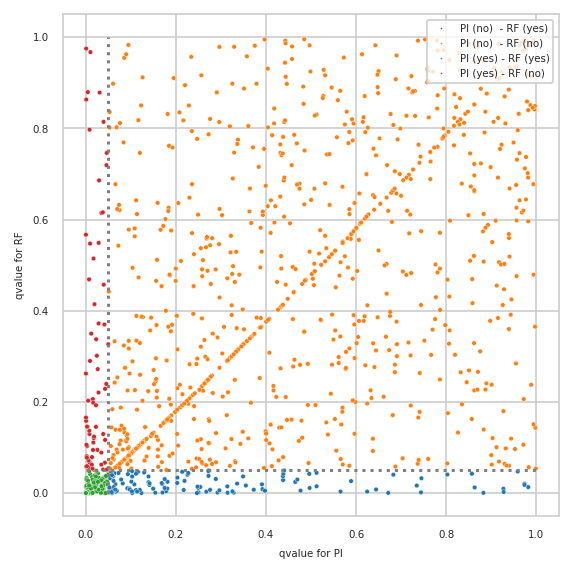

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
pimmslearn.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_RF/diff_analysis_comparision_2_RF


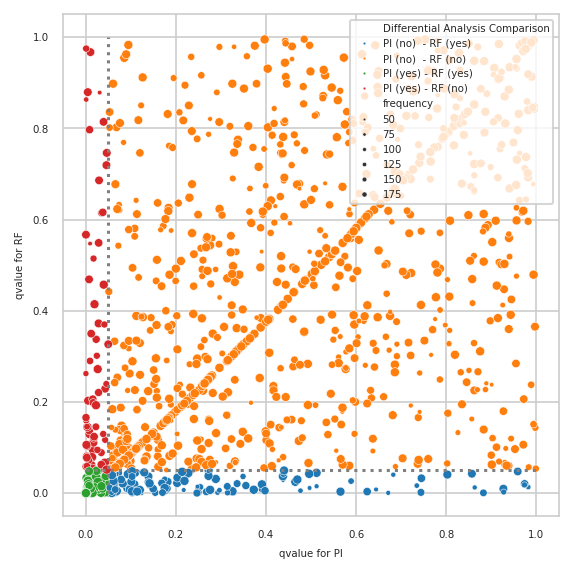

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
pimmslearn.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = pimmslearn.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

pimmslearn.databases.diseases - WARNING  There are more associations available


,ENSP,score
None,,
PSEN2,ENSP00000355747,5.000
APOE,ENSP00000252486,5.000
PSEN1,ENSP00000326366,5.000
APP,ENSP00000284981,5.000
MAPT,ENSP00000340820,4.800
...,...,...
AP1M2,ENSP00000465685,0.682
CRISPLD2,ENSP00000262424,0.681
PRSS23,ENSP00000280258,0.681


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

/home/runner/work/pimms/pimms/project/.snakemake/conda/6192e93206804e092b1c71b91535a817_/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out